# _import modules & set constants_

In [1]:
# enable in-line MatPlotLib
%matplotlib inline

In [82]:
# import Python modules
from __future__ import division, print_function
from matplotlib import pyplot
import multiprocessing
import numpy
import os
import pandas
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [12]:
# set CONSTANTS

# using AWS EMR?
AWS_EMR_MODE = os.path.expanduser('~') == '/home/hadoop'

# data paths
DATA_FILE_NAME = 'UsedCars.csv'
DATA_URL = 'https://raw.githubusercontent.com/ChicagoBoothML/DATA___UsedCars/master/%s' % DATA_FILE_NAME

# number of examples to display from a data set
NB_EXAMPLES_TO_SHOW = 9

# random seed
RANDOM_SEED = 99

In [6]:
# install ChicagoBoothML_Helpy
CHICAGOBOOTHML_HELPY_INSTALLATION_COMMAND = \
    'pip install --upgrade git+git://GitHub.com/ChicagoBoothML/Helpy --no-dependencies'
if AWS_EMR_MODE:
    os.system('sudo %s' % CHICAGOBOOTHML_HELPY_INSTALLATION_COMMAND)
else:
    os.system(CHICAGOBOOTHML_HELPY_INSTALLATION_COMMAND)
    
# import from package
from ChicagoBoothML_Helpy.EvaluationMetrics import mse, rmse

# import Used Cars data set

In [13]:
# read Used Cars data into data frame
used_cars_df = \
    pandas.read_csv(
        DATA_URL,
        dtype=dict(
            price=float,
            trim=pandas.Categorical,
            isOneOwner=pandas.Categorical,
            mileage=float,
            year=float,
            color=pandas.Categorical,
            displacement=float,
            fuel=pandas.Categorical,
            region=pandas.Categorical,
            soundSystem=pandas.Categorical,
            wheelType=pandas.Categorical))

used_cars_df[:NB_EXAMPLES_TO_SHOW]

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296,1995,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622,1999,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673,1999,Silver,4.2,Gasoline,SoA,unsp,Alloy
5,7400,430,f,82419,2002,White,4.3,Gasoline,Mid,Bose,Alloy
6,10850,430,f,101264,2000,White,4.3,Gasoline,SoA,unsp,unsp
7,8990,430,f,110651,2001,Black,4.3,Gasoline,SoA,unsp,Alloy
8,7950,430,f,108173,2000,Silver,4.3,Gasoline,ESC,Bose,unsp


Let's now split the data set into a Training set for fitting models and a Test set for evaluating them:

_(**note**: here we shall skip splitting a Validation set because we can use Out-of-Bag and Cross Validation RMSE estimates)_

In [15]:
used_cars_train_df, used_cars_test_df = \
    train_test_split(
        used_cars_df,
        train_size=.8,
        random_state=RANDOM_SEED)

In [17]:
used_cars_train_df[:NB_EXAMPLES_TO_SHOW]

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
17246,15000,430,f,83072,2005,Silver,4.3,Gasoline,SoA,unsp,Alloy
12228,33900,550,t,33976,2007,Silver,5.5,Gasoline,SoA,Harman Kardon,Alloy
6267,51995,550,t,16399,2013,unsp,4.6,Gasoline,Mid,Harman Kardon,Alloy
14924,58995,550,f,17000,2012,Black,4.6,Gasoline,New,Premium,Alloy
9499,30980,550,f,57514,2008,White,5.5,Gasoline,Pac,Harman Kardon,unsp
15656,17750,430,f,44087,2006,Blue,4.3,Gasoline,ENC,unsp,Alloy
14082,30850,550,f,71020,2007,unsp,5.5,Gasoline,Mid,unsp,unsp
1317,32995,550,f,82364,2008,other,5.5,Gasoline,WSC,unsp,Alloy
11422,10990,500,f,91577,2002,Silver,5.0,Gasoline,SoA,Bose,unsp


In [18]:
used_cars_test_df[:NB_EXAMPLES_TO_SHOW]

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
1203,56444,550,f,26334,2013,White,4.6,Gasoline,WSC,unsp,unsp
11046,68290,550,f,15367,2012,Black,4.6,Gasoline,SoA,Harman Kardon,Alloy
3054,10995,430,f,116733,2004,Silver,4.3,Gasoline,WSC,unsp,unsp
19279,60992,550,t,25809,2012,Black,4.6,Gasoline,SoA,unsp,unsp
3035,35862,400,f,75989,2010,White,3.5,Hybrid,SoA,Harman Kardon,Alloy
4894,49492,550,f,17232,2010,Gray,5.5,Gasoline,WSC,Premium,Alloy
10913,10995,55 AMG,f,136105,2002,Silver,5.4,Gasoline,Pac,Bose,Alloy
8583,53995,550,f,24482,2013,White,4.6,Gasoline,Mid,unsp,unsp
13134,15495,430,f,78491,2005,White,4.3,Gasoline,SoA,unsp,unsp


To sanity-check, let's plot the distributions of the _price_ variable in the 3 data sets:

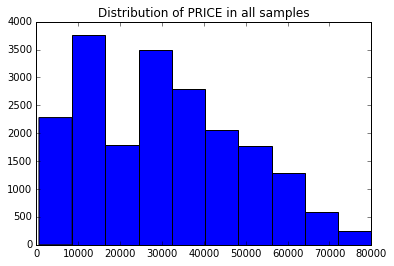

In [19]:
pyplot.hist(list(used_cars_df.price))
pyplot.title('Distribution of PRICE in all samples')

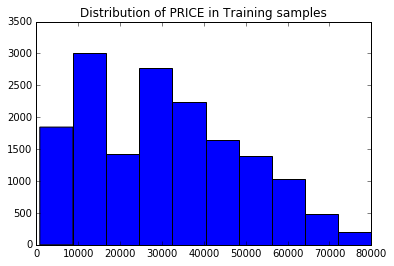

In [21]:
pyplot.hist(list(used_cars_train_df.price))
pyplot.title('Distribution of PRICE in Training samples')

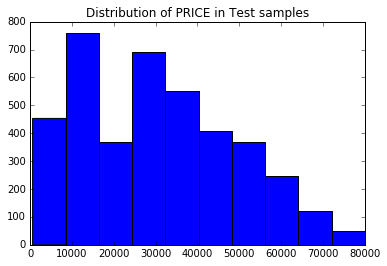

In [22]:
pyplot.hist(list(used_cars_test_df.price))
pyplot.title('Distribution of PRICE in Test samples')

# Random Forest models

In [24]:
B = 300

rf_model = \
    RandomForestRegressor(
        n_estimators=B,
        criterion='mse',
        max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
        min_samples_split=60,
        min_samples_leaf=30,
        min_weight_fraction_leaf=0.0,
        max_features='auto',   # number of features to consider when looking for the best split; "auto": max_features=n_features
        max_leaf_nodes=None,   # None: unlimited number of leaf nodes
        bootstrap=True,
        oob_score=True,   # estimate Out-of-Bag RMSE
        n_jobs=multiprocessing.cpu_count() - 2,   # paralellize over all CPU cores but 2
        random_state=RANDOM_SEED,
        verbose=0,
        warm_start=False)

## Random Forest with 2 Predictors

In [25]:
rf_model.fit(
    X=used_cars_train_df[['mileage', 'year']],
    y=used_cars_train_df.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=30,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=2, oob_score=True, random_state=99,
           verbose=0, warm_start=False)

The estimated OOB RMSE of this Random Forest Model is:

In [27]:
# note that the "oob_score_" provided by SciKit is the estimated Out-of-Bag R^2
# from R^2 we can derive a rough RMSE
numpy.sqrt(used_cars_train_df['price'].var() * (1 - rf_model.oob_score_))

5395.4169888935658

The Test-set OOS RMSE is:

In [28]:
rmse(y_hat=rf_model.predict(used_cars_test_df[['mileage', 'year']]),
     y=used_cars_test_df.price)

5234.5403545179061

## Random Forest with Many Predictors

In [29]:
predictor_names = \
    ['trim', 'isOneOwner', 'mileage', 'year', 'color',
     'displacement', 'fuel', 'region', 'soundSystem', 'wheelType']

In [30]:
rf_model.fit(
    X=pandas.get_dummies(
        used_cars_train_df[predictor_names]),
    y=used_cars_train_df.price)
    # (GET_DUMMIES expands the categorical variables)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=30,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=2, oob_score=True, random_state=99,
           verbose=0, warm_start=False)

The estimated OOB RMSE of this Random Forest Model is:

In [32]:
# note that the "oob_score_" provided by SciKit is the estimated Out-of-Bag R^2
# from R^2 we can derive a rough RMSE
numpy.sqrt(used_cars_train_df['price'].var() * (1 - rf_model.oob_score_))

4498.1062890751618

The Test-set OOS RMSE is:

In [33]:
rmse(y_hat=rf_model.predict(pandas.get_dummies(used_cars_test_df[predictor_names])),
     y=used_cars_test_df.price)

4469.8265582407212

# Boosted Trees models

In [34]:
B = 1000

boost_model = \
    GradientBoostingRegressor(
        n_estimators=B,
        loss='ls',   # Least-Squares objective loss function
        learning_rate=.01,   # shrinkage parameter
        subsample=1.0,
        min_samples_split=200,
        min_samples_leaf=100,
        min_weight_fraction_leaf=0.0,
        max_depth=10,   # maximum tree depth / number of levels of interaction
        init=None,
        random_state=RANDOM_SEED,
        max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
        alpha=0.9,   # NOT RELEVANT for Least-Squares loss function
        verbose=0,
        max_leaf_nodes=None,   # None: unlimited number of leaf nodes
        warm_start=False)

## Boosted Trees with 2 Predictors

Based on the Training set, a Boosted Trees ensemble with 2 predictors has the following estimated OOS RSME:

In [36]:
def mse_score(estimator, X, y):
    y_hat = estimator.predict(X)
    return mse(y_hat, y)

numpy.sqrt(
    cross_val_score(
        boost_model,
        X=used_cars_train_df[['mileage', 'year']],
        y=used_cars_train_df.price,
        cv=KFold(n=len(used_cars_train_df),
                 n_folds=5,   # 5-fold cross validation
                 shuffle=True),
        scoring=mse_score).mean())

5403.4564884785932

And the Test-set OOS RMSE is:

In [20]:
boost_model.fit(
    X=used_cars_train_df[['mileage', 'year']],
    y=used_cars_train_df.price)

rmse(y_hat=boost_model.predict(used_cars_test_df[['mileage', 'year']]),
     y=used_cars_test_df.price)

5229.3123880159728

## Boosted Trees with Many Predictors

Based on the Training set, a Boosted Trees ensemble with many predictors has the following estimated OOS RSME:

In [37]:
numpy.sqrt(
    cross_val_score(
        boost_model,
        X=pandas.get_dummies(used_cars_train_df[predictor_names]),
        y=used_cars_train_df.price,
        cv=KFold(n=len(used_cars_train_df),
                 n_folds=5,   # 5-fold cross validation
                 shuffle=True),
        scoring=mse_score).mean())

4160.4750471882962

And the Test-set OOS RMSE is:

In [38]:
boost_model.fit(
    X=pandas.get_dummies(used_cars_train_df[predictor_names]),
    y=used_cars_train_df.price)

rmse(y_hat=boost_model.predict(pandas.get_dummies(used_cars_test_df[predictor_names])),
     y=used_cars_test_df.price)

4092.6074245786417

Overall, this exercise shows the power of simple but extremely flexible trees-based methods such as Random Forest and Boosted Trees. When having many variables, all we have to do is to throw them into a trees ensemble!

# _BONUS:_ Apache Spark solution

In [39]:
# Apache Spark settings
if AWS_EMR_MODE:
    SPARK_MODE = 'yarn-client'                 # running Spark on AWS EMR YARN cluster
    SPARK_HOME = '/usr/lib/spark'              # default Spark installation folder on AWS EMR master node
    SPARK_DRIVER_MEMORY = '9g'                 # memory allocated to MapReduce driver process
    SPARK_EXECUTOR_MEMORY = '3g'               # memory allocated to each MapReduce executor process
    SPARK_DRIVER_MAX_RESULT_SIZE = '6g'        # maximum size of objects collected back to MapReduce driver process
else:
    SPARK_MODE = 'local'                       # running Spark on single machine
    SPARK_HOME = '/Applications/spark-1.5.2'   # Spark installation folder on my machine
    SPARK_DRIVER_MEMORY = '5g'                 # memory allocated to MapReduce driver process 
    SPARK_EXECUTOR_MEMORY = '1g'               # memory allocated to each MapReduce executor process
    SPARK_DRIVER_MAX_RESULT_SIZE = '3g'        # maximum size of objects collected back to MapReduce driver process

In [40]:
if 'pyspark' not in vars():   # set up Apache Spark environment if not yet done so
    
    # set environment variables for Spark
    os.environ['SPARK_HOME'] = SPARK_HOME
    os.environ['SPARK_HIVE'] = 'true'
    
    # enable importing of PySpark through FindSpark package
    import findspark
    findspark.init()
    
    # import PySpark and set up SparkContext ("sc") & HiveContext ("hc")
    import pyspark
    
    sc = pyspark.SparkContext(
        conf=pyspark.SparkConf()
            .setMaster(SPARK_MODE)
            .setAppName('BostonHousing')
            .set('spark.driver.memory', SPARK_DRIVER_MEMORY)
            .set('spark.executor.memory', SPARK_EXECUTOR_MEMORY)
            .set('spark.driver.maxResultSize', SPARK_DRIVER_MAX_RESULT_SIZE))
    
    hc = pyspark.sql.HiveContext(sc)
    
print('SparkContext:', sc)
print('HiveContext:', hc)

('SparkContext:', <pyspark.context.SparkContext object at 0x7fdc61aef950>)
('HiveContext:', <pyspark.sql.context.HiveContext object at 0x7fdc618ef550>)


In [46]:
# import from PySpark
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import \
    GBTRegressor as SparkML_GBTRegressor, \
    RandomForestRegressor as SparkML_RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [42]:
# download PySpark_CSV parser and put it into SparkContext
!curl https://raw.githubusercontent.com/seahboonsiew/pyspark-csv/master/pyspark_csv.py --output pyspark_csv.py
    
sc.addPyFile('pyspark_csv.py')

from pyspark_csv import csvToDataFrame

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5493  100  5493    0     0  10498      0 --:--:-- --:--:-- --:--:-- 10482


In [43]:
# download data
os.system('curl %s --output %s' %(DATA_URL, DATA_FILE_NAME))

if AWS_EMR_MODE:
    os.system('hadoop fs -put %s %s' % (DATA_FILE_NAME, DATA_FILE_NAME))

In [44]:
# parse data set
used_cars_ddf = \
    csvToDataFrame(
        sqlCtx=hc,
        rdd=sc.textFile(DATA_FILE_NAME),
        columns=None,
        sep=',',
        parseDate=True)\
    .cache()

used_cars_ddf.registerTempTable('used_cars')

used_cars_ddf.show(NB_EXAMPLES_TO_SHOW)

+-----+----+----------+-------+----+------+------------+--------+------+-----------+---------+
|price|trim|isOneOwner|mileage|year| color|displacement|    fuel|region|soundSystem|wheelType|
+-----+----+----------+-------+----+------+------------+--------+------+-----------+---------+
| 2988| 320|         f| 193296|1995| Black|         3.2|Gasoline|   SoA|       unsp|    Alloy|
| 6595| 320|         f| 129948|1995| other|         3.2|Gasoline|   Mid|    Premium|    Alloy|
| 7993| 320|         f| 140428|1997| White|         3.2|Gasoline|   Mid|       Bose|    Alloy|
| 5995| 420|         f| 113622|1999|Silver|         4.2|Gasoline|   Mid|       unsp|    Alloy|
| 3000| 420|         f| 167673|1999|Silver|         4.2|Gasoline|   SoA|       unsp|    Alloy|
| 7400| 430|         f|  82419|2002| White|         4.3|Gasoline|   Mid|       Bose|    Alloy|
|10850| 430|         f| 101264|2000| White|         4.3|Gasoline|   SoA|       unsp|     unsp|
| 8990| 430|         f| 110651|2001| Black|       

In [92]:
used_cars_ddf.printSchema()

root
 |-- price: integer (nullable = true)
 |-- trim: string (nullable = true)
 |-- isOneOwner: string (nullable = true)
 |-- mileage: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- color: string (nullable = true)
 |-- displacement: double (nullable = true)
 |-- fuel: string (nullable = true)
 |-- region: string (nullable = true)
 |-- soundSystem: string (nullable = true)
 |-- wheelType: string (nullable = true)



In [109]:
predicted_var = 'price'

numerical_features = \
    ['mileage',
     'year',
     'displacement']

string_categorical_feature_names = \
    ['trim',
     'isOneOwner',
     'color',
     'fuel',
     'region',
     'soundSystem',
     'wheelType']

In [112]:
# convert integer features to double
used_cars_ddf = hc.sql(
    "SELECT \
        %s, \
        %s \
    FROM \
        used_cars"
    % (', '.join(['CAST(%s AS DOUBLE) AS %s' % (v, v)
                  for v in [predicted_var] + numerical_features]),
       ', '.join(string_categorical_feature_names)))\
    .cache()

used_cars_ddf.registerTempTable('used_cars')

used_cars_ddf.printSchema()

root
 |-- price: double (nullable = true)
 |-- mileage: double (nullable = true)
 |-- year: double (nullable = true)
 |-- displacement: double (nullable = true)
 |-- trim: string (nullable = true)
 |-- isOneOwner: string (nullable = true)
 |-- color: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- region: string (nullable = true)
 |-- soundSystem: string (nullable = true)
 |-- wheelType: string (nullable = true)



In [114]:
# split data into Train & Test sets
used_cars_train_ddf, used_cars_test_ddf = \
    used_cars_ddf.randomSplit(
        weights=[.5, .5],
        seed=RANDOM_SEED)

## Set up pipeline

In [115]:
string_categorical_indexed_feature_names = []
string_categorical_feature_string_indexers = {}

string_categorical_one_hot_encoded_feature_names = []
string_categorical_feature_one_hot_encoders = {}

for feature_name in string_categorical_feature_names:
    
    string_indexed_feature_name = '%s___idx' % feature_name
    string_categorical_indexed_feature_names.append(string_indexed_feature_name)
    string_indexer = \
        StringIndexer(
            inputCol=feature_name,
            outputCol=string_indexed_feature_name)\
        .fit(dataset=used_cars_ddf)
    string_categorical_feature_string_indexers[feature_name] = \
        string_indexer
    
    one_hot_encoded_feature_name = '%s___ohe' % feature_name
    string_categorical_one_hot_encoded_feature_names.append(one_hot_encoded_feature_name)
    one_hot_encoder = \
        OneHotEncoder(        
            inputCol=string_indexed_feature_name,
            outputCol=one_hot_encoded_feature_name)
    string_categorical_feature_one_hot_encoders[feature_name] = \
        one_hot_encoder
        
    print('Pre-Processing for %s:' % feature_name.upper())
    one_hot_encoder.transform(
        string_indexer.transform(used_cars_ddf))\
    .select(feature_name,
            string_indexed_feature_name,
            one_hot_encoded_feature_name)\
    .show(NB_EXAMPLES_TO_SHOW)

Pre-Processing for TRIM:
+----+----------+--------------+
|trim|trim___idx|    trim___ohe|
+----+----------+--------------+
| 320|       7.0|(10,[7],[1.0])|
| 320|       7.0|(10,[7],[1.0])|
| 320|       7.0|(10,[7],[1.0])|
| 420|       8.0|(10,[8],[1.0])|
| 420|       8.0|(10,[8],[1.0])|
| 430|       1.0|(10,[1],[1.0])|
| 430|       1.0|(10,[1],[1.0])|
| 430|       1.0|(10,[1],[1.0])|
| 430|       1.0|(10,[1],[1.0])|
+----+----------+--------------+
only showing top 9 rows

Pre-Processing for ISONEOWNER:
+----------+----------------+----------------+
|isOneOwner|isOneOwner___idx|isOneOwner___ohe|
+----------+----------------+----------------+
|         f|             0.0|   (1,[0],[1.0])|
|         f|             0.0|   (1,[0],[1.0])|
|         f|             0.0|   (1,[0],[1.0])|
|         f|             0.0|   (1,[0],[1.0])|
|         f|             0.0|   (1,[0],[1.0])|
|         f|             0.0|   (1,[0],[1.0])|
|         f|             0.0|   (1,[0],[1.0])|
|         f|        

In [117]:
feature_vector_assembler = \
    VectorAssembler(
        inputCols=
            string_categorical_one_hot_encoded_feature_names +
            ['mileage', 'year', 'displacement'],
        outputCol='used_car_features')

In [120]:
regression_evaluator = \
    RegressionEvaluator(
        predictionCol='predicted_price',
        labelCol='price',
        metricName='rmse')

## Set up and train Regressors

In [118]:
rf_regressor = \
    SparkML_RandomForestRegressor(
        featuresCol='used_car_features',
        labelCol='price',
        predictionCol='predicted_price',
        maxDepth=9,
        maxBins=32,
        minInstancesPerNode=1,
        minInfoGain=0.,
        maxMemoryInMB=256,
        cacheNodeIds=False,
        checkpointInterval=10,
        seed=None,
        impurity='variance',
        numTrees=900,
        featureSubsetStrategy='auto')

# create Pipeline Estimator
rf_pipeline_estimator = \
    Pipeline(
        stages=
            string_categorical_feature_string_indexers.values() +
            string_categorical_feature_one_hot_encoders.values() +    
            [feature_vector_assembler, rf_regressor])

In [119]:
# train Random Forest model
rf_pipeline_model = \
    rf_pipeline_estimator.fit(
        dataset=used_cars_train_ddf)

In [122]:
# test-set Random Forest error
regression_evaluator.evaluate(
    rf_pipeline_model.transform(used_cars_test_ddf))

4292.946201559255

and Gradient Boosted Trees Regression model can be built & evaluated similarly...